In [129]:
%matplotlib notebook
import numpy

In [130]:
import pandas
activity = pandas.read_csv("../processed/activity_features_aggregate.txt", index_col=0, sep="\t")
ukbb = pandas.read_csv("../processed/ukbb_data_table.txt", index_col=0, sep="\t")

In [131]:
ukbb.describe()

,education_Prefer_not_to_answer,education_None_of_the_above,education_College_or_University_degree,education_A_levels/AS_levels_or_equivalent,education_O_levels/GCSEs_or_equivalent,education_CSEs_or_equivalent,education_NVQ_or_HND_or_HNC_or_equivalent,"education_Other_professional_qualifications_eg:_nursing,_teaching",medication_cholesterol_bp_diabetes_Do_not_know,medication_cholesterol_bp_diabetes_Prefer_not_to_answer,...,BMI,hip_circumference,waist_circumference,weight,age_bilateral_oophorectomy,age_hysterectomy,age_menopause,age_last_HRT,age_start_HRT,age_periods_started
count,497886.000000,497886.000000,497886.000000,497886.000000,497886.000000,497886.000000,497886.000000,497886.000000,226945.000000,226945.000000,...,499423.000000,500309.000000,500368.000000,499754.000000,21198.000000,49854.000000,154630.00000,93776.000000,93226.000000,264542.000000
mean,0.011033,0.171274,0.323711,0.261540,0.450961,0.129572,0.182785,0.279761,0.009196,0.001410,...,27.432664,103.401652,90.310918,78.054660,47.446363,43.928070,49.66436,42.534646,47.376719,12.969816
std,0.104455,0.376749,0.467892,0.439474,0.497590,0.335832,0.386490,0.448882,0.095454,0.037524,...,4.803095,9.249566,13.485857,15.945757,7.773400,8.037897,5.14153,25.272923,5.445444,1.623211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.121200,30.000000,20.000000,30.000000,10.000000,10.000000,18.00000,-11.000000,16.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.138900,97.000000,80.000000,66.500000,43.000000,39.000000,47.00000,46.000000,45.000000,12.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,26.743300,102.000000,90.000000,76.400000,48.000000,44.000000,50.00000,53.000000,48.000000,13.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,29.908400,108.000000,99.000000,87.500000,52.000000,49.000000,53.00000,57.000000,51.000000,14.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,74.683700,195.000000,197.000000,197.700000,69.000000,69.000000,68.00000,70.000000,70.000000,25.000000


In [143]:
data = activity.copy()
data['oestradiol'] = data.index.map(ukbb.oestradiol)
data['testosterone'] = data.index.map(ukbb.testosterone)
data['sex'] = data.index.map(ukbb.sex)
data['birth_year'] = data.index.map(ukbb.birth_year)
data['age_menopause'] = data.index.map(ukbb.age_menopause)
data['had_menopause'] = ~data['age_menopause'].isna()
data['HRT_ever'] = ~data.index.map(ukbb.age_start_HRT).isna()
data['HRT_stopped'] = ~data.index.map(ukbb.age_last_HRT).isna() | (data.index.map(ukbb.age_last_HRT) == -11)
data['HRT'] = pandas.Categorical(data.HRT_ever.astype(str).str.cat(data.HRT_stopped.astype(str)))
data['birth_month'] = data.index.map(ukbb.birth_month)
data['log_oestradiol'] = numpy.log(data.oestradiol)
data['income'] = data.index.map(ukbb.household_income)

In [144]:
# Down sample for testing
import numpy
numpy.random.seed(0)
selected_ids = numpy.random.choice(data.index, size=(10_000))
data = data.loc[selected_ids]

<IPython.core.display.Javascript object>


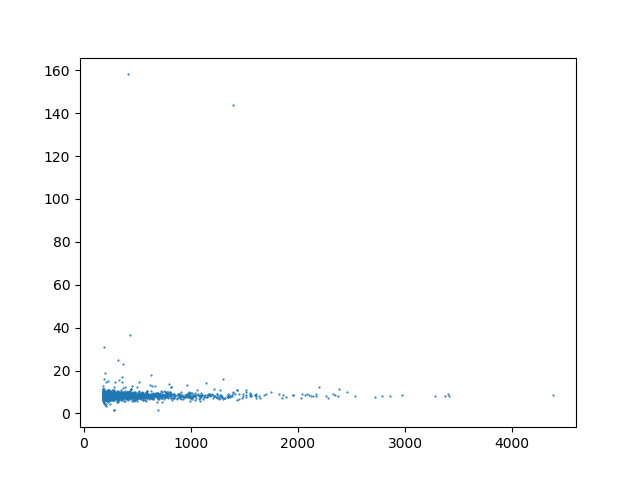

In [78]:
import pylab
pylab.scatter(data.oestradiol, data.main_sleep_duration_avg, s=0.3)
pylab.show()

In [146]:
data.income.describe()

count                 9932
unique                   7
top       31,000 to 51,999
freq                  2521
Name: income, dtype: object

In [145]:
import seaborn as sns
sns.lmplot(x="income", y="light_while_main_sleep_avg", data=data, hue="sex")

<IPython.core.display.Javascript object>

TypeError: nan is not a string

In [113]:
sns.lmplot(y="oestradiol", x="birth_year", data=data[data.sex=="Female"], hue="HRT_stopped")

TypeError: '<' not supported between instances of 'list' and 'str'

In [108]:
(~data.HRT & data.had_menopause).sum()

18681

<IPython.core.display.Javascript object>


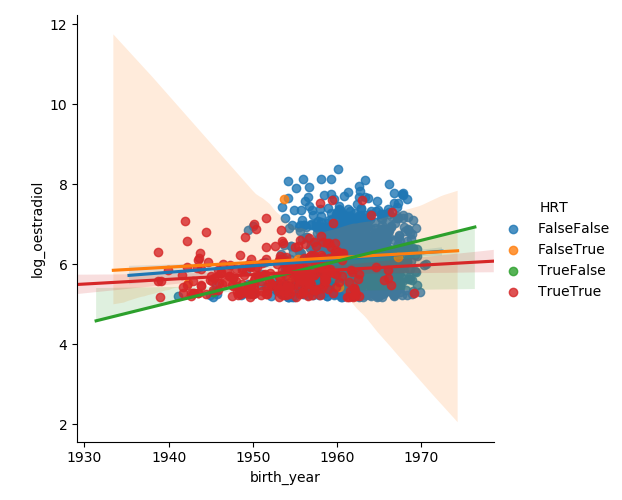

In [134]:
sns.lmplot(x="birth_year", y="log_oestradiol", hue="HRT", data=data[data.sex == "Female"], x_jitter=0.5)